Self-Organizing Maps

In [7]:
from clustering_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from minisom import MiniSom
import math

# Sklearn auxiliary items
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# Pandas options
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


%load_ext autoreload
%autoreload 2

In [53]:
df = preprocess('customer_info.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33542 entries, 0 to 34059
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Unnamed: 0                               33542 non-null  float64       
 1   customer_id                              33542 non-null  float64       
 2   customer_name                            33542 non-null  float64       
 3   customer_gender                          33542 non-null  float64       
 4   customer_birthdate                       33210 non-null  datetime64[ns]
 5   kids_home                                33542 non-null  float64       
 6   teens_home                               33542 non-null  float64       
 7   number_complaints                        33542 non-null  float64       
 8   distinct_stores_visited                  33542 non-null  float64       
 9   lifetime_spend_groceries               

In [ ]:
# Training a Self-Organized Map with a 10 by 10 grid, using 6 features.
som = MiniSom(
    10,
    10,
    6,
    sigma=0.5,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

A good way to assess where we can stop the number iterations is to find the `quantization error` throughout the iterations.

In [ ]:
# Set the seed of Numpy just to be sure of replicability
np.random.seed(42)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(scaled_data, i)
    q_errors.append(som.quantization_error(scaled_data))

In [ ]:
# Setting up the same som again and retraining it
som = MiniSom(
    15,
    15,
    6, 
    sigma=0.5,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42)
som.train(scaled_data, 1000)

We have 11 shopping areas:
*  'Groceries'
*  'Electronics'
*  'Vegetables'
*  'Non-Alcoholic Drinks'
*  'Alcoholinc Drinks'
*  'Meat'
*  'Fish'
*  'Hygiene'
*  'Videogames'
*  'Pet Food'
*  'Distinct Products'

In [36]:
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

def train_som_cluster(df, features, som_size=10, iterations=1000, sigma=1.0, learning_rate=0.5):
    """
    Train a Self-Organizing Map (SOM) and assign each row a cluster label.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        features (list): List of feature column names to use for SOM.
        som_size (int): Size of SOM grid (e.g., 10 creates a 10x10 grid).
        iterations (int): Number of training iterations.
        sigma (float): Spread of the neighborhood function.
        learning_rate (float): Learning rate for SOM.
        
    Returns:
        pd.DataFrame: DataFrame with an additional 'som_cluster' column.
    """
    df = df.copy()
    
    # 1. Extract and scale features
    X = df[features].values
    X_scaled = StandardScaler().fit_transform(X)

    # 2. Initialize and train SOM
    som = MiniSom(x=som_size,
                  y=som_size, 
                  input_len=X.shape[1], 
                  sigma=sigma, 
                  learning_rate=learning_rate)
    
    som.random_weights_init(X_scaled)
    np.random.seed(42)
    som.train(X_scaled, num_iteration=iterations, verbose=True)

    # 3. Assign cluster to each data point
    df['som_cluster'] = ([som.winner(X_scaled[i]) for i in range(0, len(X_scaled))])
    return df


In [37]:
features = [
    'lifetime_spend_groceries',
    'lifetime_spend_electronics',
    'lifetime_spend_meat',
    'lifetime_total_distinct_products',
    'percentage_of_products_bought_promotion',
    'lifetime_spend_alcohol_drinks',
    'number_complaints',
    'distinct_stores_visited',
    'typical_hour'
]
som = train_som_cluster(df, features, som_size=10, iterations=1000, sigma=1.0, learning_rate=0.5)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.3898887241760678


In [38]:
som

,Unnamed: 0,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,dbscan_label,is_outlier,som_cluster
0,-0.999296,0.496041,-0.890797,1.0,1972-01-15 14:27:00,1.0,1.0,0.0,0.5,-0.383816,0.608311,0.000000,0.309302,1.183721,0.535450,1.007364,1.195147,-0.266667,0.299685,0.569307,1.564706,-0.203225,0.428571,-1.0,-0.756352,0.890802,-0.032258,-0.428571,0.5,0.0,False,"(7, 1)"
1,-0.999237,-0.658799,0.499335,0.0,1944-07-31 10:53:00,-1.0,0.0,-1.0,0.5,-0.341900,-0.655540,0.142857,0.386047,-0.816279,-0.638095,-0.254786,-0.370071,-0.361582,-0.763407,-0.430693,-0.276471,2.503605,-0.285714,0.0,-0.381874,-0.185371,0.870968,0.285714,-1.0,0.0,False,"(5, 9)"
2,-0.999179,0.971675,0.310441,1.0,1989-11-13 14:11:00,1.0,2.0,-1.0,2.0,-0.004633,0.307221,0.142857,1.308140,1.225581,1.232804,0.602356,1.273003,0.430885,0.056782,-0.599010,1.170588,-0.347897,-0.571429,-1.0,1.145655,0.280688,-0.580645,0.571429,0.5,0.0,False,"(8, 0)"
3,-0.999120,0.077757,0.236504,0.0,1976-08-09 06:23:00,-1.0,-1.0,0.0,-1.0,-0.109665,3.052679,0.142857,-0.502326,-0.427907,1.214815,0.036819,0.073812,-0.745763,1.141956,-0.212871,0.594118,0.052993,-0.857143,-1.0,-0.173732,-0.076823,-0.161290,0.857143,0.5,0.0,False,"(2, 4)"
4,-0.999061,-0.179118,-0.641825,0.0,1966-07-11 08:12:00,0.0,0.0,0.0,1.0,1.627609,0.062443,0.142857,-0.234884,0.634884,-0.169312,0.101620,0.788675,0.620716,-0.646688,-0.836634,0.729412,0.199530,-0.428571,0.0,1.110559,0.219957,0.161290,0.428571,0.0,0.0,False,"(7, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,0.998709,0.852779,0.309884,1.0,1999-01-20 18:47:00,0.0,0.0,-1.0,-0.5,2.261731,0.528610,0.428571,0.410465,0.174419,0.864550,-0.334315,0.985844,0.623729,0.195584,-0.272277,0.252941,-0.194134,0.428571,-1.0,0.088268,1.506112,-0.903226,-0.428571,0.5,0.0,False,"(4, 2)"
34056,0.998768,0.370751,-0.059799,0.0,1984-08-01 19:50:00,0.0,0.0,-1.0,0.0,0.018605,0.198456,0.000000,0.048837,0.686047,-0.013757,0.421208,-0.145602,0.474576,-0.170347,0.029703,1.523529,0.949836,0.571429,0.0,-0.080415,-0.344966,-0.419355,-0.571429,0.5,0.0,False,"(4, 0)"
34057,0.998827,0.976121,0.054540,1.0,2000-09-16 07:22:00,0.0,-1.0,0.0,-0.5,-0.051885,1.331063,0.571429,-0.067442,-0.444186,-0.235979,-0.596465,0.768453,-0.400753,1.536278,-1.004950,0.635294,0.750936,0.428571,-1.0,0.583884,-0.435589,-0.935484,-0.428571,0.5,0.0,False,"(2, 5)"
34058,0.998885,-0.081604,-0.115669,1.0,1961-04-09 10:52:00,0.0,0.0,0.0,0.5,1.053692,0.404178,-0.571429,-0.308140,0.074419,0.478095,0.466863,0.194135,0.683992,0.264984,0.311881,0.182353,0.496231,0.000000,0.0,-0.446103,0.023578,0.322581,0.000000,-0.5,0.0,False,"(1, 2)"


In [43]:
som.groupby('som_cluster').size().sort_values()

som_cluster
(5, 6)      65
(1, 5)      66
(7, 7)      79
(8, 3)      99
(5, 2)     112
          ... 
(6, 8)     578
(1, 6)     634
(9, 4)     888
(6, 9)     942
(9, 3)    1420
Length: 100, dtype: int64

In [44]:
import umap

TypeError: 'Series' object is not callable

In [49]:
umap_object = umap.UMAP(n_neighbors=5, random_state=2)
umap = umap_object.fit_transform(df)



#umap_embedding = umap_object.fit_transform(df)
 # create a scatter plot of the UMAP output
#visualize_dimensionality_reduction(umap_embedding, y_sample.sort_index())

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[bool_]'>)

In [41]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def plot_umap_with_clusters(df, features, cluster_col='som_cluster', n_neighbors=15, min_dist=0.1):
    """
    Plot 2D UMAP of the dataset, optionally colored by cluster.

    Parameters:
        df (pd.DataFrame): Input data.
        features (list): Feature columns to use for UMAP.
        cluster_col (str): Optional column name for coloring (e.g., 'som_cluster').
        n_neighbors (int): UMAP neighborhood size.
        min_dist (float): Minimum distance between embedded points.
    """
    # Scale features
    X = StandardScaler().fit_transform(df[features])

    # UMAP reduction
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(X)

    # Plotting
    plt.figure(figsize=(10, 7))
    if cluster_col:
        sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                        hue=df[cluster_col], palette="tab20", s=60, alpha=0.8)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=cluster_col)
    else:
        plt.scatter(embedding[:, 0], embedding[:, 1], s=50, alpha=0.7)
    plt.title("UMAP Projection of Customer Data")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.tight_layout()
    plt.show()


/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


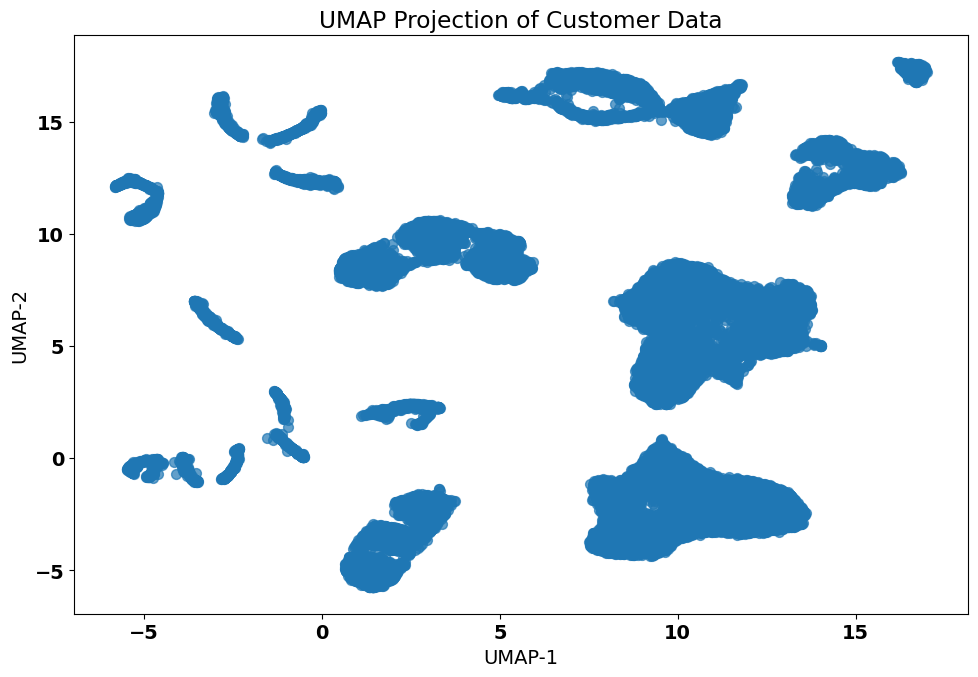

In [42]:
plot_umap_with_clusters(df, features, cluster_col=None, n_neighbors=15, min_dist=0.1)
